# Chapter.4 Single-variate Linear Regression

## Programming Assignment.4-06 Learning with Cost

PA 4-06에서는 PA 4-05에서 살펴본 cost function의 contour plot을 이용하여 $\theta_{1}, \theta_{0}$가 update되는 모습을 살펴봅니다.  
이는 linear regression에서 여러개의 data sample들에 대한 cost function을 이용해 weight와 bias를 update할 때, 학습에 어떤 영향을 미치는지 확인합니다.

그리고 PA 4-06에서는 iteration마다 동일한 mini-batch를 사용하여 update합니다. 이를 통해 cost function의 모양에 따라 $\theta_{1}, \theta_{0}$가 어떻게 $\theta_{1}^{*}, \theta_{0}^{*}$에 가까워지는지 확인할 수 있습니다.  
하지만 실제 linear regression 학습시에는 iteration마다 다른 data sample들이 사용되므로 cost function들은 달라집니다.  
따라서 PA 4-06에서 cost function에 따른 학습경향에 집중하길 바랍니다.


즉, PA 4-03에서 확인했듯이 data sample마다 contour plot의 모습이 달라지고 이 contour plot들을 이용하여 $\theta_{1}, \theta_{0}$가 학습되는 모습을 확인합니다.

PA 4-04는 다음과 같은 단계들로 이루어집니다.

<ul>
    <li> Step.0 Related Functions </li>
    <li> Step.1 Learning with Two Data Samples </li>
    <li> Step.2 Learning with Many Data Samples </li>
    <li> Step.3 Learning with Normal Distributions </li>
</ul>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.0 Related Functions

Step.0에서는 PA 4-06과 관련된 함수들을 정의합니다.  
2가지 함수로 get_contours, trainer 함수입니다.  

각각 PA 4-05에서 만들었던 cost funcntion의 contour plot을 그려주고, dataset에 대해 학습된 $\theta_{1}, \theta_{0}$을 return해줍니다.

다음의 셀을 실행시켜 함수들을 정의해주세요.

In [125]:
def get_contours(x_data, y_data, ax):
    th1_range = np.linspace(-1, 3, 100)
    th0_range = np.linspace(1, 5, 100)
    Th1, Th0 = np.meshgrid(th1_range, th0_range)

    ax.tick_params(axis = 'both', labelsize = 20)
    
    cost = np.zeros(shape = Th1.shape)
    for data_idx, (x,y) in enumerate(zip(x_data, y_data)):
        loss = np.power(y - (Th1*x + Th0), 2)
        cost += loss
        
        levels = np.geomspace(np.min(loss) + 0.01, np.max(loss), 30)
        cmap = cm.get_cmap('Blues_r', lut = len(levels))
        
    levels = np.geomspace(np.min(cost) + 0.01, np.max(cost), 30)
    cmap = cm.get_cmap('Blues_r', lut = len(levels))
    ax.contour(Th1, Th0, cost,
               levels = levels, cmap = cmap,
               alpha = 0.5)
    ax.set_xlabel(r"$\theta_{1}$", fontsize = 30)
    ax.set_ylabel(r"$\theta_{0}$", fontsize = 30)
    
    
def trainer(x_data, y_data, lr, epochs, th1, th0):
    th1_list, th0_list = [th1], [th0]

    for epoch in range(epochs):
        dth1_list, dth0_list = [], []
        for x,y in zip(x_data, y_data):
            pred = th1*x + th0

            dth1 = -2*x*(y-pred)
            dth0 = -2*(y-pred)

            dth1_list.append(dth1)
            dth0_list.append(dth0)

        dth1 = np.mean(np.array(dth1_list))
        dth0 = np.mean(np.array(dth0_list))

        th1 = th1 - lr*dth1
        th0 = th0 - lr*dth0

        th1_list.append(th1)
        th0_list.append(th0)
    return th1_list, th0_list

def theta_tracker(x_data, y_data, th1_list, th0_list):
    fig, ax = plt.subplots(figsize = (10,10))
    get_contours(x_data, y_data, ax)
    ax.plot(th1_list, th0_list,
              marker = 'o', markersize = 5,
              color = 'r', linestyle = ':')

다음의 코드는 다음의 조건들에 대해 위의 2개 함수를 이용하여 dataset에 대해 $\theta_{1}, \theta_{0}$가 어떻게 update되는지 확인하는 코드입니다.  
즉, dataset에 들어있는 4개의 data sample들을 이용해 cost를 구하고
$$(\theta_{1}, \theta_{0}) := (\theta_{1}, \theta_{0}) - \alpha \bigtriangledown_{(\theta_{1}, \theta_{0})}{J}(\theta_{1}, \theta_{0})$$
위의 식을 이용하여 iteration마다 $\theta_{1}, \theta_{0}$가 어떻게 변하는지 보여줍니다.

- dataset from $y = x + 3$
- x data : -0.5, -0.3, 0.5, 1
- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

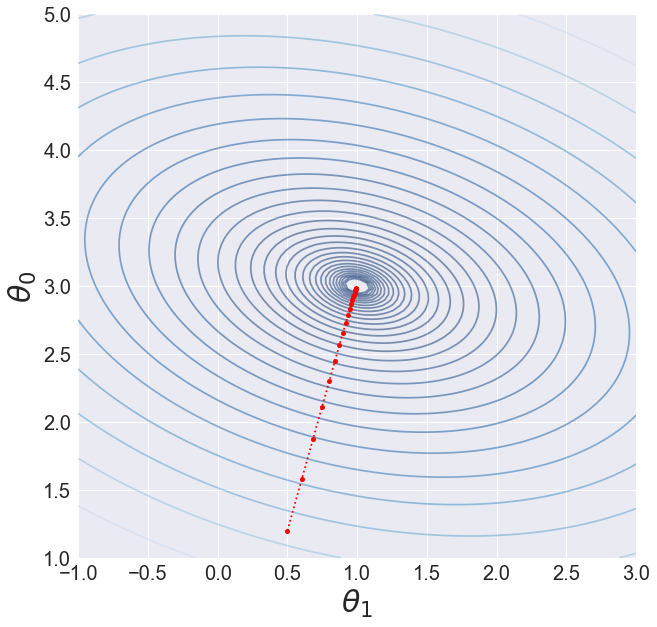

In [127]:
# Dataset Preparation
x_data = np.array([-0.5, -0.3, 0.5, 1])
y_data = x_data + 3

# Learning Preparation
th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20

# Learning
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)

# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
## Step.1 Learning with Two Data Samples

Step.1에서는 다양한 2개의 data sample들의 cost function을 이용해 학습이 어떻게 일어나는지 확인합니다.  
이를 통해 기본적으로 loss function들의 평균값을 이용했을 때, 학습이 어떻게 일어나는지 알 수 있습니다.

***
**Programming**  
먼저 
- $(x^{(1)}, x^{(2)}) = (-1, 1)$  

일 때의 학습을 살펴봅니다. 위의 테스트 코드에서 x_data를 수정하여 다음 조건에서의 학습을 확인하세요.  
그리고 cost function이 이상적으로 convex할 때 $\theta_{1}, \theta_{0}$이 어떻게 $\theta_{1}^{*}, \theta_{0}^{*}$에 가까워지는지 경향성을 확인하세요.


- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

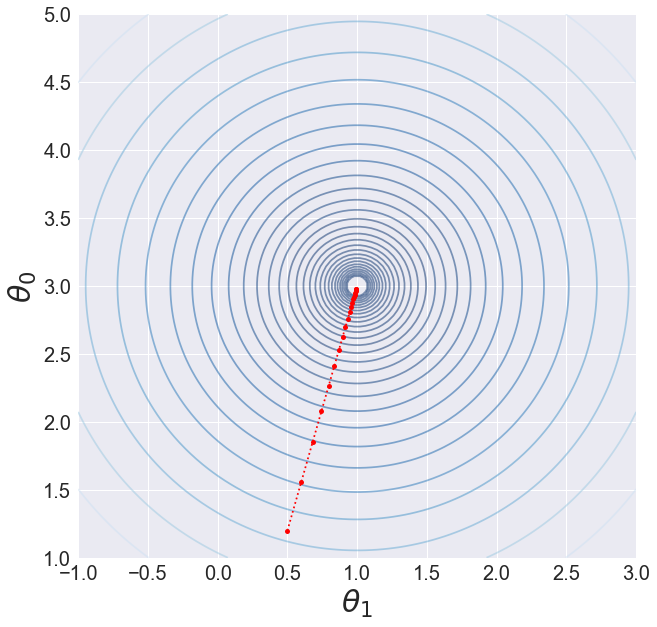

In [128]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([-1, 1])
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####

##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)


***
**Programming**  
다음 data sample들의 x값에 대하여 학습을 살펴봅니다.
- $(x^{(1)}, x^{(2)}) = (-2, 2)$  

이 dataset에 대한 결과와 이전의 결과들을 비교해보고 그 원인을 수학적으로 분석해보세요.


- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

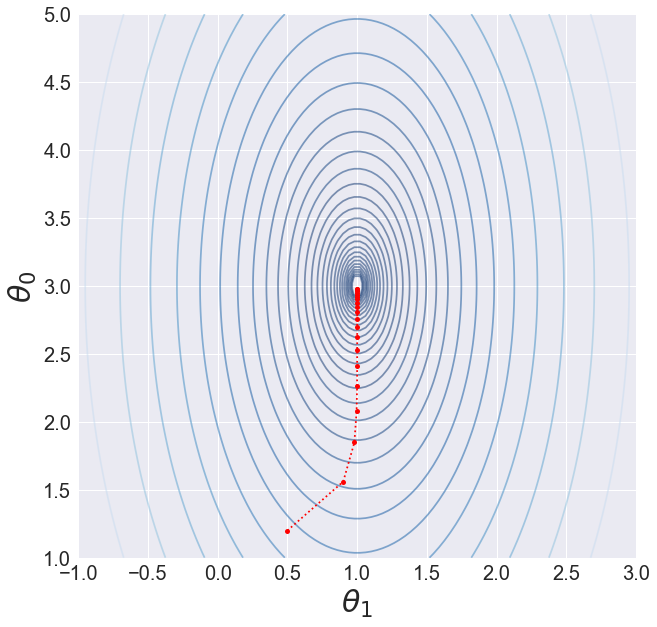

In [129]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([-2, 2])
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
**Programming**  
다음 data sample들의 x값에 대하여 학습을 살펴봅니다.
- $(x^{(1)}, x^{(2)}) = (-0.5, 0.5)$  

이 dataset에 대한 결과와 이전의 결과들을 비교해보고 그 원인을 수학적으로 분석해보세요.


- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

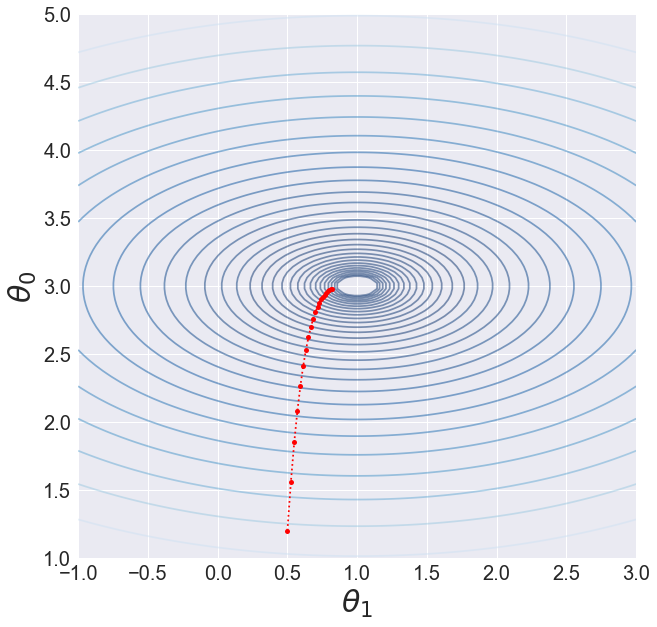

In [130]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([-0.5, 0.5])
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### Start Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
**Programming**  
다음 data sample들의 x값에 대하여 학습을 살펴봅니다.
- $(x^{(1)}, x^{(2)}) = (2, 3)$  

이 dataset에 대한 결과와 이전의 결과들을 비교해보고 그 원인을 수학적으로 분석해보세요.


- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

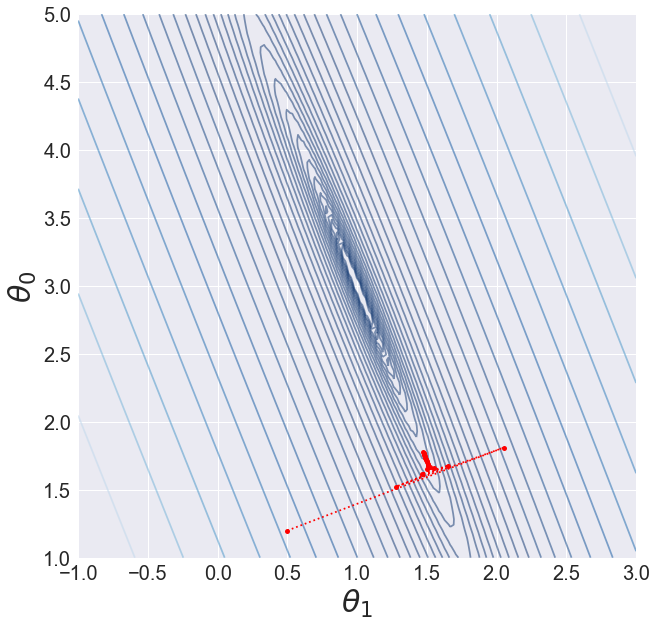

In [131]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([2, 3])
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### Start Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
**Programming**  
다음 data sample들의 x값에 대하여 학습을 살펴봅니다.
- $(x^{(1)}, x^{(2)}) = (0.1, 0.2)$  

이 dataset에 대한 결과와 이전의 결과들을 비교해보고 그 원인을 수학적으로 분석해보세요.


- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

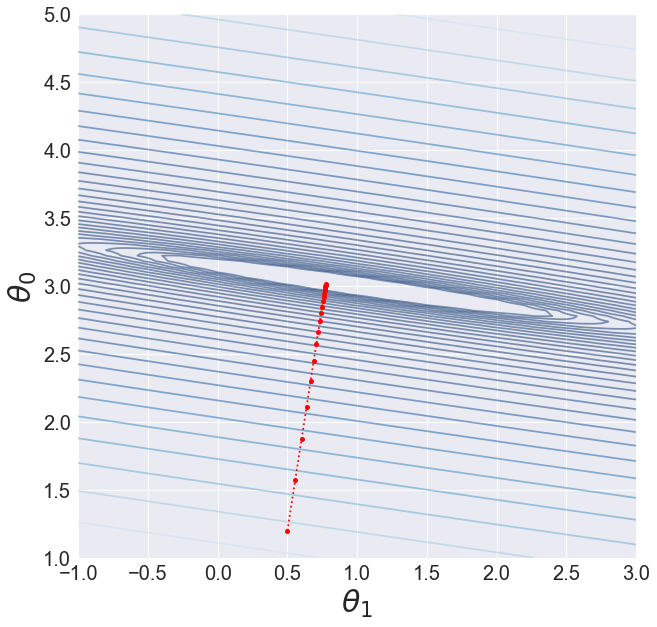

In [98]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([0.1, 0.2])
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
## Step.2 Learning with Many Data Samples

Step.2에서는 여러개의 data sample들을 이용해 cost를 구하고 이 cost에 대해 GDM을 진행해봅니다.

Step.2에서는 모든 PA 문제들에 대해 $J = \theta_{1}^{2} + \theta_{0}^{2}$의 모양에 가까워지도록 cost function을 만들고 이에 대해 GDM을 진행해보세요.  
즉, $\theta_{1}, \theta_{0}$가 $\theta_{1}^{*}, \theta_{0}^{*}$에 최대한 direct하게 접근하도록 만들어보세요.

***
**Programming**  
data sample 2개가 다음과 같이 주어졌을 때,  
- $(x^{(1)}, x^{(2)}) = (0.1, 0.2)$  

data sample들을 추가하여 $\theta_{1}, \theta_{0}$가 $\theta_{1}^{*}, \theta_{0}^{*}$에 direct하게 접근하도록 만들어보세요.

- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

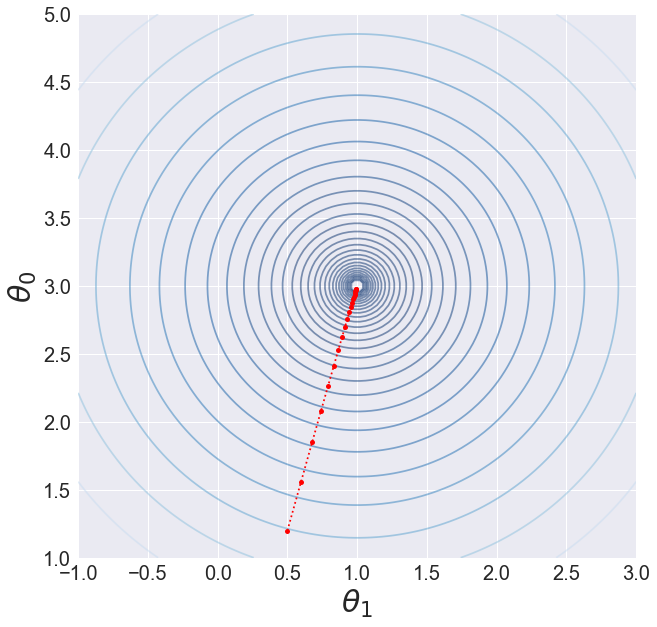

In [101]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([0.1, 0.2, -0.1, -0.2, 1.7, -1.7])
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
**Programming**  
data sample 1개가 다음과 같이 주어졌을 때,  
- $(x^{(1)}) = (2)$  

data sample들을 추가하여 $\theta_{1}, \theta_{0}$가 $\theta_{1}^{*}, \theta_{0}^{*}$에 direct하게 접근하도록 만들어보세요.

- initial $\theta_{1}, \theta_{0}$ = 0.5, 1.2
- learning rate = 0.1
- total epoch = 20

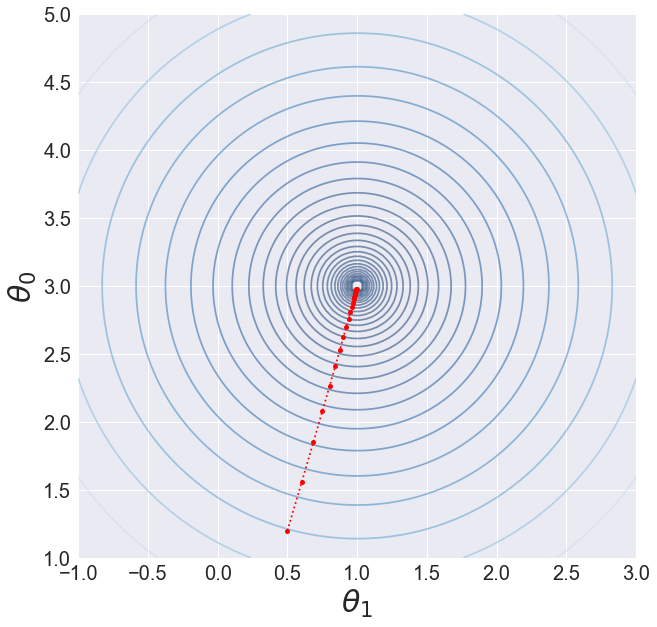

In [102]:
##### Start Your Code(Learning Preparation) #####
x_data = np.array([2, -2, 0.1, -0.1, 0.2, -0.2, -0.3, 0.3])
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
## Step.3 Learning with Normal Distributions

Step.3에서는 normal distribution에서부터 30개의 data sample을 만들고, 이 data sample들을 이용하여 $\theta_{1}, \theta_{0}$을 학습시킵니다.  
이때 mean, standard deviation이 바뀔 때 mini-batch의 특성을 생각해보고 학습의 변화가 일어나는 이유를 생각해보세요.  
그리고 코드들을 여러번 반복하여 같은 distribution에서도 다양한 cost function에 따른 학습을 확인해보세요.

***
**Programming**  
다음의 조건에서의 $\theta_{1}, \theta_{0}$ 변화를 확인하고 결과를 수학적으로 분석하세요.
- mean = 0
- standard deviation = 1
- n_sample = 30

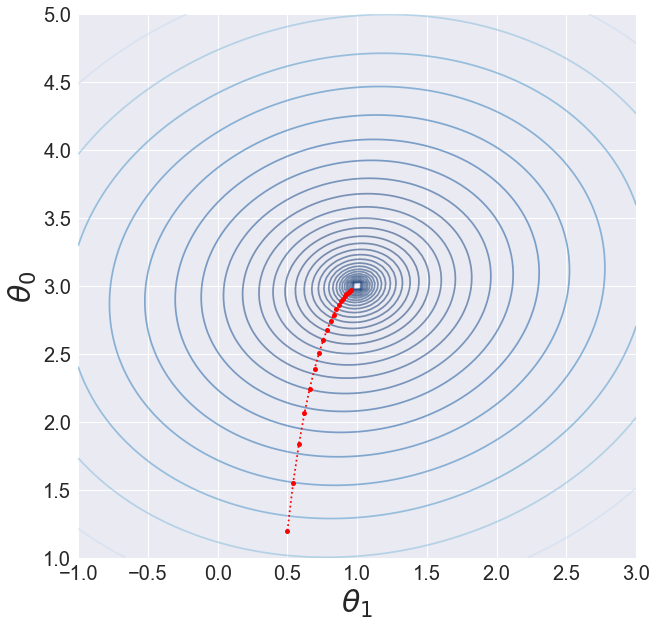

In [110]:
##### Start Your Code(Learning Preparation) #####
mu, std = 0, 1
n_sample = 30
x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)


***
**Programming**  
다음의 조건에서의 $\theta_{1}, \theta_{0}$ 변화를 확인하고 결과를 수학적으로 분석하세요.
- mean = 0
- standard deviation = 3
- n_sample = 30

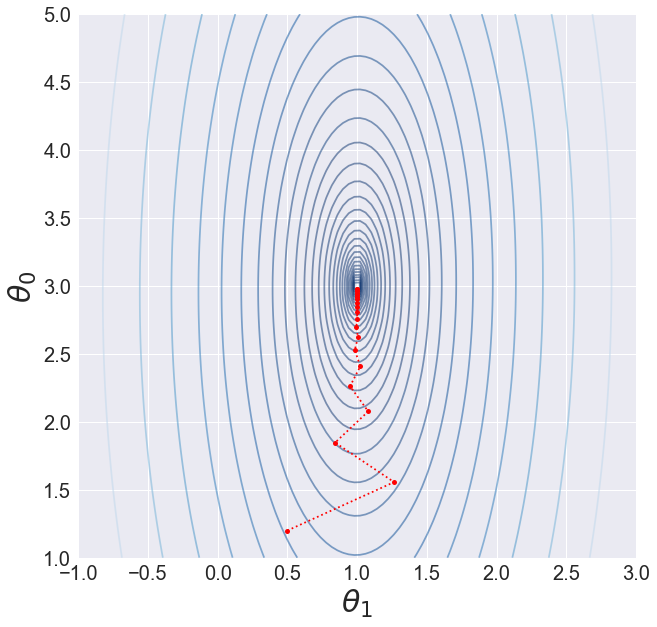

In [118]:
##### Start Your Code(Learning Preparation) #####
mu, std = 0, 3
n_sample = 30
x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
**Programming**  
다음의 조건에서의 $\theta_{1}, \theta_{0}$ 변화를 확인하고 결과를 수학적으로 분석하세요.
- mean = 0
- standard deviation = 0.2
- n_sample = 30

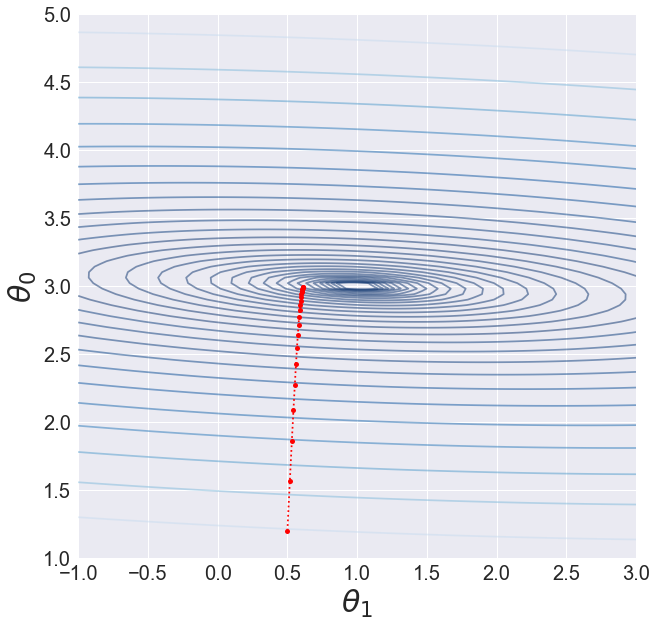

In [112]:
##### Start Your Code(Learning Preparation) #####
mu, std = 0, 0.2
n_sample = 30
x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
**Programming**  
다음의 조건에서의 $\theta_{1}, \theta_{0}$ 변화를 확인하고 결과를 수학적으로 분석하세요.
- mean = 2
- standard deviation = 1
- n_sample = 30

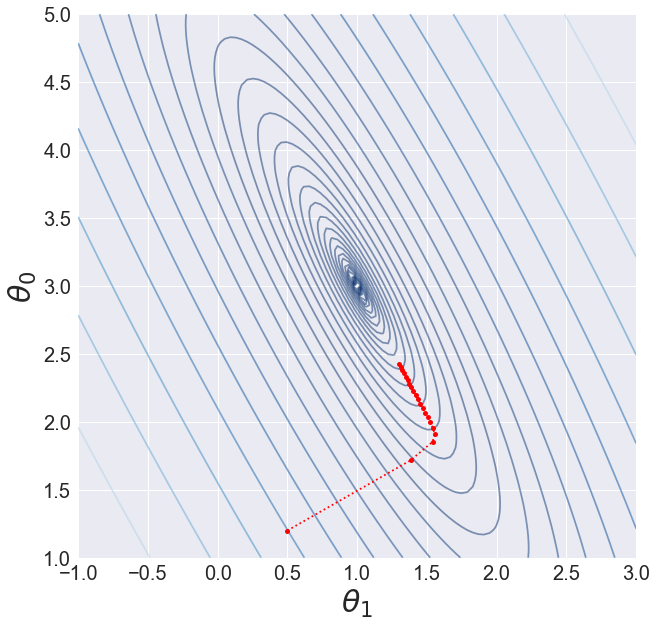

In [113]:
##### Start Your Code(Learning Preparation) #####
mu, std = 2, 1
n_sample = 30
x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)

***
**Programming**  
다음의 조건에서의 $\theta_{1}, \theta_{0}$ 변화를 확인하고 결과를 수학적으로 분석하세요.
- mean = -2
- standard deviation = 1
- n_sample = 30

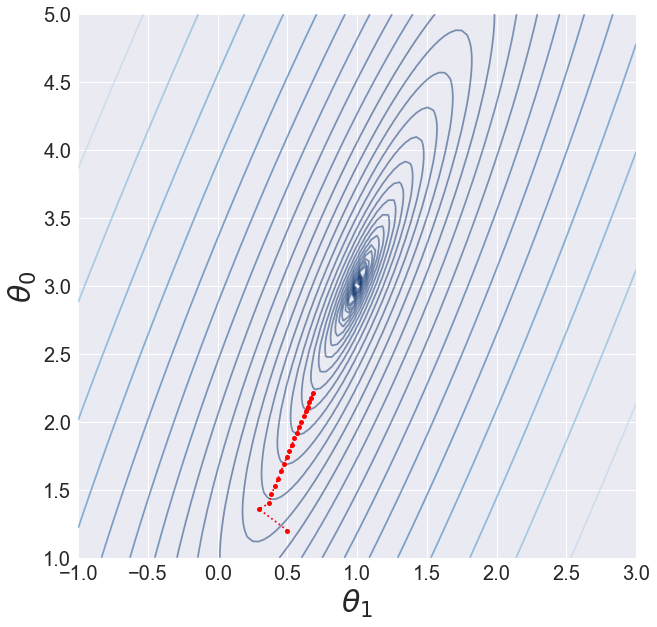

In [114]:
##### Start Your Code(Learning Preparation) #####
mu, std = -2, 1
n_sample = 30
x_data = np.random.normal(mu, std, n_sample)
y_data = x_data + 3

th1, th0 = 0.5, 1.2
lr = 0.1
epochs = 20
##### End Your Code(Learning Preparation) #####


##### Start Your Code(Learning) #####
th1_list, th0_list = trainer(x_data, y_data, lr, epochs, th1, th0)
##### End Your Code(Learning) #####


# Result Visualization
theta_tracker(x_data, y_data, th1_list, th0_list)